In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import  PorterStemmer
import matplotlib.pyplot as mlt
import math
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import warnings
import json
from sklearn.model_selection import  train_test_split
%matplotlib inline

In [2]:
sms_table=pd.read_csv('dataset/spam.csv',encoding='latin-1')

In [3]:
sms_table.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
sms_table.shape

(5572, 5)

In [5]:
sms_table[sms_table['v1']=='ham'].shape

(4825, 5)

In [6]:
sms_table[sms_table['v1']=='spam'].shape

(747, 5)

In [7]:
##there are more ham messages than spam
new_sms_table=sms_table.iloc[:,:2]

In [8]:
new_sms_table.shape

(5572, 2)

In [9]:
new_sms_table.rename(columns={"v1": "labels", "v2": "sms"},inplace=True)

/home/alkesha/.local/lib/python3.5/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [10]:
new_sms_table.head()

,labels,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
new_sms_table['size']=new_sms_table['sms'].apply(len)

/home/alkesha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
new_sms_table.head()

,labels,sms,size
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
dummies={'spam':1,'ham':0}

In [14]:
new_sms_table['labels']=new_sms_table['labels'].replace(dummies)

/home/alkesha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
new_sms_table['labels'] = pd.to_numeric(new_sms_table['labels'], errors='coerce')

/home/alkesha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
new_sms_table.head()

,labels,sms,size
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
new_sms_table['labels'].value_counts()

0    4825
1     747
Name: labels, dtype: int64

In [18]:
X=new_sms_table['sms']
Y=new_sms_table['labels']
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2, random_state=42)

In [19]:
train_X.head()

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
Name: sms, dtype: object

In [20]:
train_Y.head()

1978    0
3989    1
3935    0
4078    0
4086    1
Name: labels, dtype: int64

In [21]:
test_X.head()

3245    Funny fact Nobody teaches volcanoes 2 erupt, t...
944     I sent my scores to sophas and i had to do sec...
1044    We know someone who you know that fancies you....
2484    Only if you promise your getting out as SOON a...
812     Congratulations ur awarded either å£500 of CD ...
Name: sms, dtype: object

In [22]:
test_Y.head()

3245    0
944     0
1044    1
2484    0
812     1
Name: labels, dtype: int64

In [23]:
#preprocessing of messages
def proc(sms, lower_case = True, stem = True, stop_words = True, gram = 2):
    sms= sms.lower()
    words = word_tokenize(sms)
    stopword = stopwords.words('english')
    words = [word for word in words if word not in stopword]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]  
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    return words

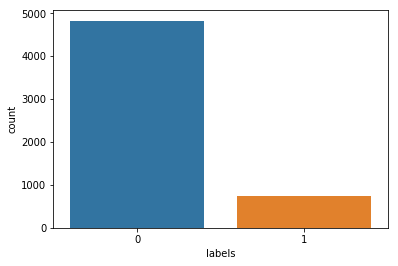

In [24]:

ax = sns.countplot(x="labels", data=new_sms_table)

In [25]:
new_sms_table.describe()

,labels,size
count,5572.000000,5572.000000
mean,0.134063,80.118808
std,0.340751,59.690841
min,0.000000,2.000000
25%,0.000000,36.000000
50%,0.000000,61.000000
75%,0.000000,121.000000
max,1.000000,910.000000


In [26]:
new_sms_table.groupby('labels').describe()

size                                                         
         count        mean        std   min    25%    50%    75%    max
labels                                                                 
0       4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
1        747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [27]:
new_sms_table['sms'].head(5).apply(proc)

0    [jurong point, point crazy.., crazy.. avail, a...
1      [lar ..., ... joke, joke wif, wif oni, oni ...]
2    [free entri, entri wkli, wkli comp, comp win, ...
3    [dun say, say earli, earli hor, hor ..., ... a...
4    [nah n't, n't think, think goe, goe usf, usf l...
Name: sms, dtype: object

In [28]:
cbow = CountVectorizer(analyzer=proc).fit(new_sms_table['sms'])

In [29]:
print(len(cbow.vocabulary_))

29194


In [35]:
from sklearn.pipeline import Pipeline
import pickle
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import  classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
   ( 'bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [36]:
 model=pipeline.fit(train_X,train_Y)

In [37]:
predictions = model.predict(test_X)

In [38]:
print(confusion_matrix(test_Y,predictions))

[[965   0]
 [ 42 108]]


In [39]:
print(classification_report(predictions,test_Y))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98      1007
          1       0.72      1.00      0.84       108

avg / total       0.97      0.96      0.96      1115



In [52]:
modelfname = 'model/spam_ham.pickle'
pickle.dump(model ,open(modelfname, 'wb'),protocol=2)

In [53]:
loaded_model = pickle.load(open(modelfname, 'rb'))
result = loaded_model.score(test_X,test_Y)
print(result)

0.9623318385650225


In [54]:
model.predict(['Free entry in 2 a wkly comp to win FA Cup finally '])

array([1])

In [55]:
loaded_model.predict(['Free entry in 2 a wkly comp to win FA Cup finally '])

array([1])

In [56]:
model.predict(["Hi how was your day ?"])

array([0])

In [57]:
loaded_model.predict(['how was your day'])

array([0])

In [46]:
#model completed